In [1]:
!pip install gradio

     |████████████████████████████████| 2.5MB 8.7MB/s 
     |████████████████████████████████| 1.9MB 34.0MB/s 
     |████████████████████████████████| 215kB 46.0MB/s 
     |████████████████████████████████| 962kB 58.5MB/s 
     |████████████████████████████████| 3.2MB 40.3MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=83b93d4920fb4d81572524b71d9d1b81d869ec34ce697d17d6fc17a2b38af77f
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=5d456e85fc02c2403358ecba8c0cb86482176ed359b6d7a7359f6295a763e588
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [2]:
import gradio as gr

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


/root/.keras/datasets/flower_photos/roses/3171577977_8608282f04_m.jpg


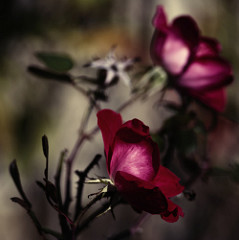

In [5]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


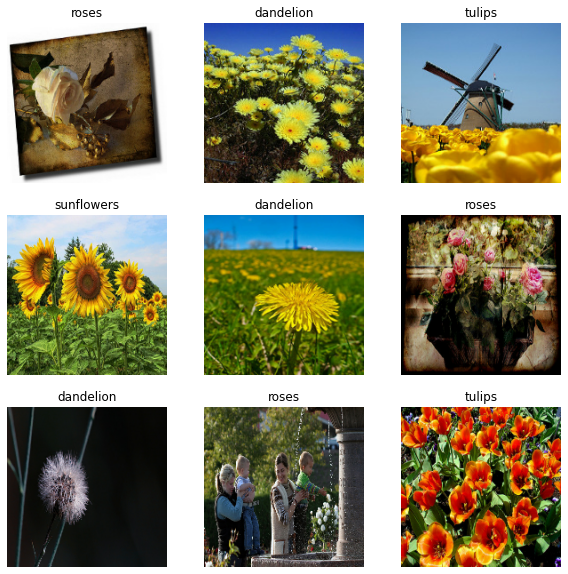

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 78s 841ms/step - loss: 0.9413 - accuracy: 0.6301 - val_loss: 0.9707 - val_accuracy: 0.6117
Epoch 2/5
92/92 [==============================] - 76s 820ms/step - loss: 0.7463 - accuracy: 0.7183 - val_loss: 0.9531 - val_accuracy: 0.6199
Epoch 3/5
92/92 [==============================] - 77s 829ms/step - loss: 0.5480 - accuracy: 0.7980 - val_loss: 1.0728 - val_accuracy: 0.6008
Epoch 4/5
92/92 [==============================] - 77s 830ms/step - loss: 0.3547 - accuracy: 0.8808 - val_loss: 1.1850 - val_accuracy: 0.6226
Epoch 5/5
92/92 [==============================] - 77s 837ms/step - loss: 0.2140 - accuracy: 0.9278 - val_loss: 1.4614 - val_accuracy: 0.6444


In [14]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [15]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://40419.gradio.app
Interface loading below...


KeyboardInterrupt: ignored